In [12]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier #Import KNN
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for metric evaluations
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt #so you can draw
import numpy as np

In [13]:
#make sure you have your labels correct
#some files have this in the file - others it is in the description
#if it is in the file you can copy them here then delete that line in the file
col_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names)
#take a peek to see if this looks right
data.head()#optional

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#split dataset in features and target variable
feature_cols = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
'insulin', 'bmi', 'diabetes_pedigree_function', 'age']
X = data[feature_cols] # Features
y = data.outcome # Target variable

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
oneTree = DecisionTreeClassifier()
# Train Decision Tree Classifer
oneTree.fit(X_train,y_train)
y_pred = oneTree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.7056277056277056


In [16]:
#K-fold Cross-Validation
'''
In k-fold cross-validation, the data is divided into k folds.
The model is trained on k-1 folds with one fold held back for testing.
This process gets repeated to ensure each fold of the dataset gets the
chance to be the held back set. Once the process is completed,
we can summarize the evaluation metric using the mean or/and the standard
deviation.
'''
kfold = model_selection.KFold(n_splits=10)
model_kfold = DecisionTreeClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print(f"Accuracy: {results_kfold.mean()} ({results_kfold.std()})")

Accuracy: 0.6925837320574162 (0.06741166993535645)


# Questions Page 4
<p>1. The accuracy with the k-fold was a bit worse than that of the regular decision tree above. The mean for the kfold results scored only  a little over 1% under the decision tree. The standard deviation also shows that there are few outliers in the data so the accuracy should represent most of the data used in the kfold.</p>
<p>2. Accidentally explained above, but the standard deviation of ~6% shows us that most of the data fall within the same mean/average value and that means that our validation above should be relatively accurate. </p>

In [17]:
#Stratified K-fold Cross-Validation
'''
Stratified K-Fold approach is a variation of k-fold cross-validation
that returns stratified folds, i.e., each set containing approximately
the same ratio of target labels as the complete data.
'''
skfold = StratifiedKFold(n_splits=10)
model_skfold = DecisionTreeClassifier()
results_skfold = model_selection.cross_val_score(model_skfold, X, y,
cv=skfold)
print(f"Accuracy: {results_skfold.mean()} ({results_skfold.std()})")

Accuracy: 0.7030587833219413 (0.06873033285781456)


# Questions Page 5 First Set
<p>1. This accuracy is a little bit better than the non-stratified k-fold and the decision tree. The standard deviation is nearly the same as the previous k-fold, meaning that the data is within in the same average values.</p>
<p>2. Roughly, they could be conisdered the same. I think since the accuracy is only slightly higher and due to the spread of the deviation being a little higher, that they could be considered the same statistically. </p>

In [18]:
#Leave One Out Cross-Validation (LOOCV)
'''
LOOCV is the cross-validation technique in which the size of the fold
is “1” with “k” being set to the number of observations in the data.
This variation is useful when the training data is of limited size and
the number of parameters to be tested is not high.
'''
loocv = model_selection.LeaveOneOut()
model_loocv = DecisionTreeClassifier()
results_loocv = model_selection.cross_val_score(model_loocv, X, y, cv=loocv)
print(f"Accuracy: {results_loocv.mean()} ({results_loocv.std()})")

Accuracy: 0.7057291666666666 (0.4557142854713235)


# Questions Page 5 Second Set
<p>1. So far, this one has the highest accuracy and the lowest standard deviation of all the validation techniques used at around 70.5% and 2.6%. </p>
<p>2. Since the standard deviation is lower than the first two, this proves to me that the dataset is smaller in comparison since this method worked just as good as the rest and has a smaller standard deviation. It also tells me that the data subsets tested pretty close to the same average each time making it the most accurate accuracy thusfar.</p>

In [19]:
#Repeated Random Test-Train Splits
'''
This technique is a hybrid of traditional train-test splitting and the k-fold
cross-validation method. In this technique, we create random splits of the
data
in the training-test set manner and then repeat the process of splitting and
evaluating the algorithm multiple times, just like the cross-validation
method.
'''
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30,
random_state=100)
model_shufflecv = DecisionTreeClassifier()
results_shufflecv = model_selection.cross_val_score(model_shufflecv, X, y,
cv=kfold2)
print(f"Accuracy: {results_shufflecv.mean()} ({results_shufflecv.std()})")

Accuracy: 0.6961038961038961 (0.026175266593646686)


# Questions Page 6
<p>1. This accuracy score is pretty similar to most, within 1% of all other accuracies. However, the standard deviation is very low at 2.6%, which is nearly half the previous lowest. </p>
<p>2. Because of how low the standard deviation is in this one, I think these results are not statistically the same. The low standard deviation means that each subset of the data tested at roughly the same accuracy percentage. This means that this one is the most consistent algorithm created so far compared to the rest. </p>

In [20]:
def lookAtModels(models):
    results=[]
    names=[]
    for name, model in models:
        skfold = StratifiedKFold(n_splits=10)
        cv_results= cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
    return names, results#not sure why I want lists yet

In [21]:
#make all your models
models =[]
for d in range(2,9):
    models.append((f'Tree depth {d}',DecisionTreeClassifier(criterion="entropy",max_depth=d)))
#see your results
names,results = lookAtModels(models)

Tree depth 2: 0.7317610062893081 (0.05299397306129626)
Tree depth 3: 0.7447938504542277 (0.048179325963155294)
Tree depth 4: 0.7132075471698114 (0.029022496922623348)
Tree depth 5: 0.7411949685534591 (0.0313505211590959)
Tree depth 6: 0.7299091544374562 (0.03597830136760317)
Tree depth 7: 0.7075471698113207 (0.04138920299324315)
Tree depth 8: 0.7001747030048917 (0.03148706527767741)


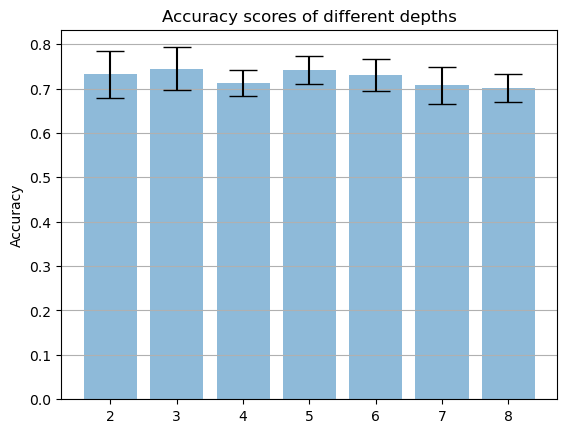

In [22]:
D2_mean = np.mean(results[0])
D2_std= np.std(results[0])
D3_mean = np.mean(results[1])
D3_std = np.std(results[1])
D4_mean = np.mean(results[2])
D4_std = np.std(results[2])
D5_mean = np.mean(results[3])
D5_std = np.std(results[3])
D6_mean = np.mean(results[4])
D6_std = np.std(results[4])
D7_mean = np.mean(results[5])
D7_std = np.std(results[5])
D8_mean = np.mean(results[6])
D8_std = np.std(results[6])

#lists for plot – I bet there is a better way to do this
depth =['2','3','4','5','6','7','8']
x_pos = np.arange(len(depth))
#print(x_pos)
Means = [D2_mean,D3_mean,D4_mean,D5_mean,D6_mean,D7_mean,D8_mean]
error = [D2_std,D3_std,D4_std,D5_std,D6_std,D7_std,D8_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=error, align='center', alpha=0.5, ecolor='black',
capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(depth)
ax.set_title('Accuracy scores of different depths')
ax.yaxis.grid(True)

# Questions Page 8
<p>1. Not necessarily significant, but there is a bit of diffence between the depths. The trees with smaller depths tend to have a higher standard deviation, I take that this is due to there being overall more bias and less variance. While higher depths of trees leads to the opposite with a tendancy of a lower standard deviation. Again, I would say that there is not evidence of "significant" difference, but there is a little bit of a trend that can be seen. </p>


In [23]:
#Fix data for KNN
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class or Outcome
# use the .drop() method to gather all features except Target Class/outcome
# axis -> argument refers to columns; a 0 would represent rows a 1 is column
scaler.fit(data.drop('outcome', axis=1))
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(data.drop('outcome',axis=1))
#Here we have the normalized dataset, minus the target/output column which is the last col
data_feat = pd.DataFrame(scaled_features, columns= data.columns[:-1])
#split dataset in features and target variable
X = data_feat
y = data['outcome'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1) # 70% training and 30% test

In [24]:
#To help with model selection
models =[]
models.append(('KNN', KNeighborsClassifier(n_neighbors=9,
metric='euclidean')))
models.append(('Tree',DecisionTreeClassifier(criterion="entropy",
max_depth=3)))

In [25]:
names,results = lookAtModels(models)

KNN: 0.7095737246680642 (0.05850162742819442)
Tree: 0.7447938504542277 (0.048179325963155294)


In [26]:
#verify your results
KNN_mean = np.mean(results[0])
KNN_std= np.std(results[0])
DT_mean = np.mean(results[1])
DT_std = np.std(results[1])
print(f'KNN mean: {KNN_mean} ({KNN_std})\nTree mean: {DT_mean} ({DT_std})')

KNN mean: 0.7095737246680642 (0.05850162742819442)
Tree mean: 0.7447938504542277 (0.048179325963155294)


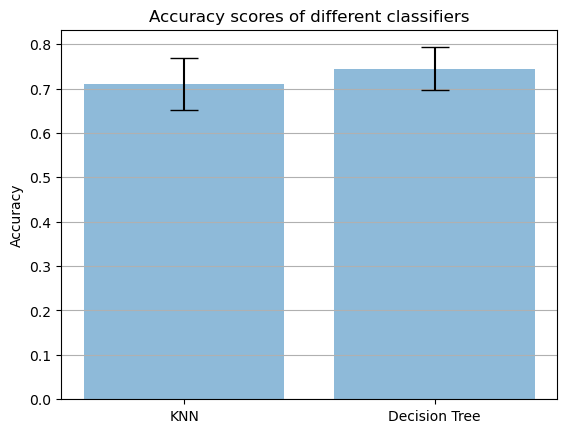

In [27]:
#lists for plot
classifiers =['KNN', 'Decision Tree']
x_pos = np.arange(len(classifiers))
#print(x_pos)
Means = [KNN_mean, DT_mean]
error = [KNN_std, DT_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=error, align='center', alpha=0.5, ecolor='black',
capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(classifiers)
ax.set_title('Accuracy scores of different classifiers')
ax.yaxis.grid(True)

# Questions Page 10
<p>1. Yes, these results are statistically different from one another. The KNN performs a bit worse than the Decision Tree in a few ways. The overall accuracy of the KNN is ~5% worse than the DT. Also, the KNN has a ~1% higher standard deviation. This shows that the DT classifier is more accurate amoungst different groupings of data whereas KNN is slightly more unpredictable, where for some groups it has a higher accuracy and others it has a lower accuracy. </p>


In [28]:
def lookAtModels(models):
    results=[]
    names=[]
    for name, model in models:
        skfold = StratifiedKFold(n_splits=10)
        cv_results= cross_val_score(model, X_train, y_train, cv=skfold, scoring='f1')
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
    return names, results#if you wish to graph later
names,results = lookAtModels(models)

KNN: 0.5287463754862473 (0.0795544065996891)
Tree: 0.5769695384642548 (0.09367782293422108)


In [31]:
#verify your results
KNN_mean = np.mean(results[0])
KNN_std= np.std(results[0])
DT_mean = np.mean(results[1])
DT_std = np.std(results[1])
print(f'KNN mean: {KNN_mean} ({KNN_std})\nTree mean: {DT_mean} ({DT_std})')

KNN mean: 0.5287463754862473 (0.0795544065996891)
Tree mean: 0.5769695384642548 (0.09367782293422108)


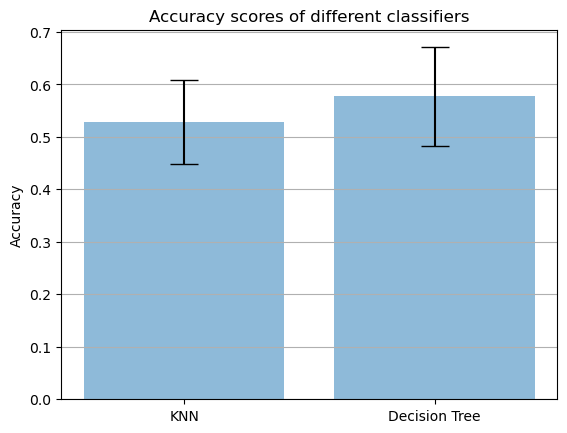

In [32]:


#lists for plot
classifiers =['KNN', 'Decision Tree']
x_pos = np.arange(len(classifiers))
#print(x_pos)
Means = [KNN_mean, DT_mean]
error = [KNN_std, DT_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=error, align='center', alpha=0.5, ecolor='black',
capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(classifiers)
ax.set_title('Accuracy scores of different classifiers')
ax.yaxis.grid(True)

# Questions Page 11 First Set
<p>1. Not at all, the f-1 scores make these models look doubly worse overall. These scores show that both of these models are hardly any better than flipping a coin to decide whether a person has diabetes or not - Actually since it is the average, this is saying that sometimes it is worse than a coin flip and other times its a small amount better. </p>
<p>2. They are only slightly different statistically. Because the DT  has a higher accuracy but higher standard deviation, it is probably on true average going to be closer to the KNN accuracy with a lower standard deviation. KNN has a much smaller standard deviation by 2% (in comparison close to 20% less than DT's standard deviation value) which means when tested with more untrained data, that the accuracy will be more stable overall than the DT.  </p>

# PERSONAL DATA SECTION

In [34]:
# Load libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # Import RandomForest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#make sure you have your labels correct
#some files have this in the file - others it is in the description
col_names = ['ACCESS_ALL_DOWNLOADS','ACCESS_CACHE_FILESYSTEM','ACCESS_CHECKIN_PROPERTIES',
                'ACCESS_COARSE_LOCATION','ACCESS_COARSE_UPDATES','ACCESS_FINE_LOCATION',
                'ACCESS_LOCATION_EXTRA_COMMANDS','ACCESS_MOCK_LOCATION','ACCESS_MTK_MMHW',
                'ACCESS_NETWORK_STATE','ACCESS_PROVIDER','ACCESS_SERVICE','ACCESS_SHARED_DATA',
                'ACCESS_SUPERUSER','ACCESS_SURFACE_FLINGER','ACCESS_WIFI_STATE','activityCalled',
                'ACTIVITY_RECOGNITION','ACCOUNT_MANAGER','ADD_VOICEMAIL','ANT','ANT_ADMIN',
                'AUTHENTICATE_ACCOUNTS','AUTORUN_MANAGER_LICENSE_MANAGER','AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
                'BATTERY_STATS','BILLING','BIND_ACCESSIBILITY_SERVICE','BIND_APPWIDGET',
                'BIND_CARRIER_MESSAGING_SERVICE','BIND_DEVICE_ADMIN','BIND_DREAM_SERVICE',
                'BIND_GET_INSTALL_REFERRER_SERVICE','BIND_INPUT_METHOD','BIND_NFC_SERVICE',
                'BIND_goodwareTIFICATION_LISTENER_SERVICE','BIND_PRINT_SERVICE','BIND_REMOTEVIEWS',
                'BIND_TEXT_SERVICE','BIND_TV_INPUT','BIND_VOICE_INTERACTION','BIND_VPN_SERVICE',
                'BIND_WALLPAPER','BLUETOOTH','BLUETOOTH_ADMIN','BLUETOOTH_PRIVILEGED','BODY_SENSORS',
                'BRICK','BROADCAST_PACKAGE_REMOVED','BROADCAST_SMS','BROADCAST_STICKY','BROADCAST_WAP_PUSH',
                'C2D_MESSAGE','CALL_PHONE','CALL_PRIVILEGED','CAMERA','CAPTURE_AUDIO_OUTPUT',
                'CAPTURE_SECURE_VIDEO_OUTPUT','CAPTURE_VIDEO_OUTPUT','CHANGE_COMPONENT_ENABLED_STATE',
                'CHANGE_CONFIGURATION','CHANGE_DISPLAY_MODE','CHANGE_NETWORK_STATE',
                'CHANGE_WIFI_MULTICAST_STATE','CHANGE_WIFI_STATE','CHECK_LICENSE','CLEAR_APP_CACHE',
                'CLEAR_APP_USER_DATA','CONTROL_LOCATION_UPDATES','DATABASE_INTERFACE_SERVICE',
                'DELETE_CACHE_FILES','DELETE_PACKAGES','DEVICE_POWER','DIAGgoodwareSTIC','DISABLE_KEYGUARD',
                'DOWNLOAD_SERVICE','DOWNLOAD_WITHOUT_goodwareTIFICATION','DUMP','EXPAND_STATUS_BAR',
                'EXTENSION_PERMISSION','FACTORY_TEST','FLASHLIGHT','FORCE_BACK','FULLSCREEN.FULL',
                'GET_ACCOUNTS','GET_PACKAGE_SIZE','GET_TASKS','GET_TOP_ACTIVITY_INFO','GLOBAL_SEARCH',
                'GOOGLE_AUTH','GOOGLE_PHOTOS','HARDWARE_TEST','INJECT_EVENTS','INSTALL_LOCATION_PROVIDER',
                'INSTALL_PACKAGES','INSTALL_SHORTCUT','INTERACT_ACROSS_USERS','INTERNAL_SYSTEM_WINDOW',
                'INTERNET','JPUSH_MESSAGE','KILL_BACKGROUND_PROCESSES','LOCATION_HARDWARE','MANAGE_ACCOUNTS',
                'MANAGE_APP_TOKENS','MANAGE_DOCUMENTS','MAPS_RECEIVE','MASTER_CLEAR','MEDIA_BUTTON',
                'MEDIA_CONTENT_CONTROL','MESSAGE','MODIFY_AUDIO_SETTINGS','MODIFY_PHONE_STATE',
                'MOUNT_FORMAT_FILESYSTEMS','MOUNT_UNMOUNT_FILESYSTEMS','NFC','PERSISTENT_ACTIVITY',
                'PERMISSION','PERMISSION_RUN_TASKS','PLUGIN','PROCESS_OUTGOING_CALLS','READ',
                'READ_ATTACHMENT','READ_AVESTTINGS','READ_CALENDAR','READ_CALL_LOG','READ_CONTACTS',
                'READ_CONTENT_PROVIDER','READ_DATA','READ_DATABASES','READ_EXTERNAL_STORAGE',
                'READ_FRAME_BUFFER','READ_GMAIL','READ_GSERVICES','READ_HISTORY_BOOKMARKS',
                'READ_INPUT_STATE','READ_LOGS','READ_MESSAGES','READ_OWNER_DATA','READ_PHONE_STATE',
                'READ_PROFILE','READ_SETTINGS','READ_SMS','READ_SOCIAL_STREAM','READ_SYNC_SETTINGS',
                'READ_SYNC_STATS','READ_USER_DICTIONARY','READ_VOICEMAIL','REBOOT','RECEIVE',
                'RECEIVE_BOOT_COMPLETED','RECEIVE_MMS','RECEIVE_SIGNED_DATA_RESULT','RECEIVE_SMS',
                'RECEIVE_USER_PRESENT','RECEIVE_WAP_PUSH','RECORD_AUDIO','REORDER_TASKS','RESPOND',
                'RESTART_PACKAGES','REQUEST','SDCARD_WRITE','SEND','SEND_RESPOND_VIA_MESSAGE','SEND_SMS',
                'SET_ACTIVITY_WATCHER','SET_ALARM','SET_ALWAYS_FINISH','SET_ANIMATION_SCALE','SET_DEBUG_APP',
                'SET_ORIENTATION','SET_POINTER_SPEED','SET_PREFERRED_APPLICATIONS','SET_PROCESS_LIMIT',
                'SET_TIME','SET_TIME_ZONE','SET_WALLPAPER','SET_WALLPAPER_HINTS',
                'SIGNAL_PERSISTENT_PROCESSES','STATUS_BAR','STORAGE','SUBSCRIBED_FEEDS_READ',
                'SUBSCRIBED_FEEDS_WRITE','SYSTEM_ALERT_WINDOW','TRANSMIT_IR','UNINSTALL_SHORTCUT',
                'UPDATE_DEVICE_STATS','USES_POLICY_FORCE_LOCK','USE_CREDENTIALS','USE_FINGERPRINT',
                'USE_SIP','VIBRATE','WAKE_LOCK','WRITE','WRITE_APN_SETTINGS','WRITE_AVSETTING',
                'WRITE_CALENDAR','WRITE_CALL_LOG','WRITE_CONTACTS','WRITE_DATA','WRITE_DATABASES',
                'WRITE_EXTERNAL_STORAGE','WRITE_GSERVICES','WRITE_HISTORY_BOOKMARKS',
                'WRITE_INTERNAL_STORAGE','WRITE_MEDIA_STORAGE','WRITE_OWNER_DATA','WRITE_PROFILE',
                'WRITE_SECURE_SETTINGS','WRITE_SETTINGS','WRITE_SMS','WRITE_SOCIAL_STREAM',
                'WRITE_SYNC_SETTINGS','WRITE_USER_DICTIONARY','WRITE_VOICEMAIL',
                'Ljava/lang/reflect/Method;->invoke','Ljavax/crypto/Cipher;->doFinal',
                'Ljava/lang/Runtime;->exec','Ljava/lang/System;->load',
                'Ldalvik/system/DexClassLoader;->loadClass','Ljava/lang/System;->loadLibrary',
                'Ljava/net/URL;->openConnection','Landroid/hardware/Camera;->open',
                'Landroid/hardware/Camera;->takePicture',
                'Landroid/telephony/SmsManager;->sendMultipartTextMessage',
                'Landroid/telephony/SmsManager;->sendTextMessage',
                'Landroid/media/AudioRecord;->startRecording',
                'Landroid/telephony/TelephonyManager;->getCellLocation',
                'Lcom/google/android/gms/location/LocationClient;->getLastLocation',
                'Landroid/location/LocationManager;->getLastKgoodwarewnLocation',
                'Landroid/telephony/TelephonyManager;->getDeviceId',
                'Landroid/content/pm/PackageManager;->getInstalledApplications',
                'Landroid/content/pm/PackageManager;->getInstalledPackages',
                'Landroid/telephony/TelephonyManager;->getLine1Number',
                'Landroid/telephony/TelephonyManager;->getNetworkOperator',
                'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
                'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimOperator',
                'Landroid/telephony/TelephonyManager;->getSimOperatorName',
                'Landroid/telephony/TelephonyManager;->getSimCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
                'Lorg/apache/http/impl/client/DefaultHttpClient;->execute',
                'Label']
# load dataset
data = pd.read_csv("TUANDROMD.csv", header=None, names=col_names, low_memory=False)
#take a peek to see if this looks right
data.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
#split dataset in features and target variable
feature_cols = ['ACCESS_ALL_DOWNLOADS','ACCESS_CACHE_FILESYSTEM','ACCESS_CHECKIN_PROPERTIES',
                'ACCESS_COARSE_LOCATION','ACCESS_COARSE_UPDATES','ACCESS_FINE_LOCATION',
                'ACCESS_LOCATION_EXTRA_COMMANDS','ACCESS_MOCK_LOCATION','ACCESS_MTK_MMHW',
                'ACCESS_NETWORK_STATE','ACCESS_PROVIDER','ACCESS_SERVICE','ACCESS_SHARED_DATA',
                'ACCESS_SUPERUSER','ACCESS_SURFACE_FLINGER','ACCESS_WIFI_STATE','activityCalled',
                'ACTIVITY_RECOGNITION','ACCOUNT_MANAGER','ADD_VOICEMAIL','ANT','ANT_ADMIN',
                'AUTHENTICATE_ACCOUNTS','AUTORUN_MANAGER_LICENSE_MANAGER','AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
                'BATTERY_STATS','BILLING','BIND_ACCESSIBILITY_SERVICE','BIND_APPWIDGET',
                'BIND_CARRIER_MESSAGING_SERVICE','BIND_DEVICE_ADMIN','BIND_DREAM_SERVICE',
                'BIND_GET_INSTALL_REFERRER_SERVICE','BIND_INPUT_METHOD','BIND_NFC_SERVICE',
                'BIND_goodwareTIFICATION_LISTENER_SERVICE','BIND_PRINT_SERVICE','BIND_REMOTEVIEWS',
                'BIND_TEXT_SERVICE','BIND_TV_INPUT','BIND_VOICE_INTERACTION','BIND_VPN_SERVICE',
                'BIND_WALLPAPER','BLUETOOTH','BLUETOOTH_ADMIN','BLUETOOTH_PRIVILEGED','BODY_SENSORS',
                'BRICK','BROADCAST_PACKAGE_REMOVED','BROADCAST_SMS','BROADCAST_STICKY','BROADCAST_WAP_PUSH',
                'C2D_MESSAGE','CALL_PHONE','CALL_PRIVILEGED','CAMERA','CAPTURE_AUDIO_OUTPUT',
                'CAPTURE_SECURE_VIDEO_OUTPUT','CAPTURE_VIDEO_OUTPUT','CHANGE_COMPONENT_ENABLED_STATE',
                'CHANGE_CONFIGURATION','CHANGE_DISPLAY_MODE','CHANGE_NETWORK_STATE',
                'CHANGE_WIFI_MULTICAST_STATE','CHANGE_WIFI_STATE','CHECK_LICENSE','CLEAR_APP_CACHE',
                'CLEAR_APP_USER_DATA','CONTROL_LOCATION_UPDATES','DATABASE_INTERFACE_SERVICE',
                'DELETE_CACHE_FILES','DELETE_PACKAGES','DEVICE_POWER','DIAGgoodwareSTIC','DISABLE_KEYGUARD',
                'DOWNLOAD_SERVICE','DOWNLOAD_WITHOUT_goodwareTIFICATION','DUMP','EXPAND_STATUS_BAR',
                'EXTENSION_PERMISSION','FACTORY_TEST','FLASHLIGHT','FORCE_BACK','FULLSCREEN.FULL',
                'GET_ACCOUNTS','GET_PACKAGE_SIZE','GET_TASKS','GET_TOP_ACTIVITY_INFO','GLOBAL_SEARCH',
                'GOOGLE_AUTH','GOOGLE_PHOTOS','HARDWARE_TEST','INJECT_EVENTS','INSTALL_LOCATION_PROVIDER',
                'INSTALL_PACKAGES','INSTALL_SHORTCUT','INTERACT_ACROSS_USERS','INTERNAL_SYSTEM_WINDOW',
                'INTERNET','JPUSH_MESSAGE','KILL_BACKGROUND_PROCESSES','LOCATION_HARDWARE','MANAGE_ACCOUNTS',
                'MANAGE_APP_TOKENS','MANAGE_DOCUMENTS','MAPS_RECEIVE','MASTER_CLEAR','MEDIA_BUTTON',
                'MEDIA_CONTENT_CONTROL','MESSAGE','MODIFY_AUDIO_SETTINGS','MODIFY_PHONE_STATE',
                'MOUNT_FORMAT_FILESYSTEMS','MOUNT_UNMOUNT_FILESYSTEMS','NFC','PERSISTENT_ACTIVITY',
                'PERMISSION','PERMISSION_RUN_TASKS','PLUGIN','PROCESS_OUTGOING_CALLS','READ',
                'READ_ATTACHMENT','READ_AVESTTINGS','READ_CALENDAR','READ_CALL_LOG','READ_CONTACTS',
                'READ_CONTENT_PROVIDER','READ_DATA','READ_DATABASES','READ_EXTERNAL_STORAGE',
                'READ_FRAME_BUFFER','READ_GMAIL','READ_GSERVICES','READ_HISTORY_BOOKMARKS',
                'READ_INPUT_STATE','READ_LOGS','READ_MESSAGES','READ_OWNER_DATA','READ_PHONE_STATE',
                'READ_PROFILE','READ_SETTINGS','READ_SMS','READ_SOCIAL_STREAM','READ_SYNC_SETTINGS',
                'READ_SYNC_STATS','READ_USER_DICTIONARY','READ_VOICEMAIL','REBOOT','RECEIVE',
                'RECEIVE_BOOT_COMPLETED','RECEIVE_MMS','RECEIVE_SIGNED_DATA_RESULT','RECEIVE_SMS',
                'RECEIVE_USER_PRESENT','RECEIVE_WAP_PUSH','RECORD_AUDIO','REORDER_TASKS','RESPOND',
                'RESTART_PACKAGES','REQUEST','SDCARD_WRITE','SEND','SEND_RESPOND_VIA_MESSAGE','SEND_SMS',
                'SET_ACTIVITY_WATCHER','SET_ALARM','SET_ALWAYS_FINISH','SET_ANIMATION_SCALE','SET_DEBUG_APP',
                'SET_ORIENTATION','SET_POINTER_SPEED','SET_PREFERRED_APPLICATIONS','SET_PROCESS_LIMIT',
                'SET_TIME','SET_TIME_ZONE','SET_WALLPAPER','SET_WALLPAPER_HINTS',
                'SIGNAL_PERSISTENT_PROCESSES','STATUS_BAR','STORAGE','SUBSCRIBED_FEEDS_READ',
                'SUBSCRIBED_FEEDS_WRITE','SYSTEM_ALERT_WINDOW','TRANSMIT_IR','UNINSTALL_SHORTCUT',
                'UPDATE_DEVICE_STATS','USES_POLICY_FORCE_LOCK','USE_CREDENTIALS','USE_FINGERPRINT',
                'USE_SIP','VIBRATE','WAKE_LOCK','WRITE','WRITE_APN_SETTINGS','WRITE_AVSETTING',
                'WRITE_CALENDAR','WRITE_CALL_LOG','WRITE_CONTACTS','WRITE_DATA','WRITE_DATABASES',
                'WRITE_EXTERNAL_STORAGE','WRITE_GSERVICES','WRITE_HISTORY_BOOKMARKS',
                'WRITE_INTERNAL_STORAGE','WRITE_MEDIA_STORAGE','WRITE_OWNER_DATA','WRITE_PROFILE',
                'WRITE_SECURE_SETTINGS','WRITE_SETTINGS','WRITE_SMS','WRITE_SOCIAL_STREAM',
                'WRITE_SYNC_SETTINGS','WRITE_USER_DICTIONARY','WRITE_VOICEMAIL',
                'Ljava/lang/reflect/Method;->invoke','Ljavax/crypto/Cipher;->doFinal',
                'Ljava/lang/Runtime;->exec','Ljava/lang/System;->load',
                'Ldalvik/system/DexClassLoader;->loadClass','Ljava/lang/System;->loadLibrary',
                'Ljava/net/URL;->openConnection','Landroid/hardware/Camera;->open',
                'Landroid/hardware/Camera;->takePicture',
                'Landroid/telephony/SmsManager;->sendMultipartTextMessage',
                'Landroid/telephony/SmsManager;->sendTextMessage',
                'Landroid/media/AudioRecord;->startRecording',
                'Landroid/telephony/TelephonyManager;->getCellLocation',
                'Lcom/google/android/gms/location/LocationClient;->getLastLocation',
                'Landroid/location/LocationManager;->getLastKgoodwarewnLocation',
                'Landroid/telephony/TelephonyManager;->getDeviceId',
                'Landroid/content/pm/PackageManager;->getInstalledApplications',
                'Landroid/content/pm/PackageManager;->getInstalledPackages',
                'Landroid/telephony/TelephonyManager;->getLine1Number',
                'Landroid/telephony/TelephonyManager;->getNetworkOperator',
                'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
                'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimOperator',
                'Landroid/telephony/TelephonyManager;->getSimOperatorName',
                'Landroid/telephony/TelephonyManager;->getSimCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
                'Lorg/apache/http/impl/client/DefaultHttpClient;->execute']

X = data[feature_cols] # Features
y = data.Label # Target variable - notice - you need to spell the column name for the target correctly for this to work
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

# Judgement of Dataset (Models/metrics to use)

<p>For this data set, it will be best to use a Decision tree type of classifier. This is because when dealing with KNN, there will be 241 individual dimensions it has to compute across which will make the KNN algorithm be less effective and hence lead to a lower accuracy and higher standard deviation overall. Since the data is also binary, it makes sense to use the Decision tree due to the nicely valued data.
<br/>
<br/>
Also, my dataset is based on whether computer applications are malware or goodware. This being said, I think it could be good to look at the recall, since the cost/damage done by misclassifying a malware as a goodware could be bad for the user checking the applications using this machine learning algorithm.
   
</p>

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
oneTree = DecisionTreeClassifier()
# Train Decision Tree Classifer
oneTree.fit(X_train,y_train)
y_pred = oneTree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.9865671641791045


In [76]:
#K-fold Cross-Validation
'''
In k-fold cross-validation, the data is divided into k folds.
The model is trained on k-1 folds with one fold held back for testing.
This process gets repeated to ensure each fold of the dataset gets the
chance to be the held back set. Once the process is completed,
we can summarize the evaluation metric using the mean or/and the standard
deviation.
'''

# sidenote: having n_splits of 10 below causes warning due to weird splitting of the data
kfold = model_selection.KFold(n_splits=9)
model_kfold = DecisionTreeClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold, scoring='recall')
print(f"Accuracy: {results_kfold.mean()} ({results_kfold.std()})")

Accuracy: 0.9975358422939069 (0.0033973456290553707)


In [77]:
#Stratified K-fold Cross-Validation
'''
Stratified K-Fold approach is a variation of k-fold cross-validation
that returns stratified folds, i.e., each set containing approximately
the same ratio of target labels as the complete data.
'''
skfold = StratifiedKFold(n_splits=10)
model_skfold = DecisionTreeClassifier()
results_skfold = model_selection.cross_val_score(model_skfold, X, y,
cv=skfold, scoring='recall')
print(f"Accuracy: {results_skfold.mean()} ({results_skfold.std()})")

Accuracy: 0.9969164070122432 (0.004239751233238321)


### Not testing Leave one out cross validation due to size of the dataset

In [78]:
#Repeated Random Test-Train Splits
'''
This technique is a hybrid of traditional train-test splitting and the k-fold
cross-validation method. In this technique, we create random splits of the
data
in the training-test set manner and then repeat the process of splitting and
evaluating the algorithm multiple times, just like the cross-validation
method.
'''
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30,
random_state=100)
model_shufflecv = DecisionTreeClassifier()
results_shufflecv = model_selection.cross_val_score(model_shufflecv, X, y,
cv=kfold2, scoring='recall')
print(f"Accuracy: {results_shufflecv.mean()} ({results_shufflecv.std()})")

Accuracy: 0.994796260132692 (0.002116156551054443)


In [83]:
def lookAtModelsRecall(models):
    results=[]
    names=[]
    for name, model in models:
        skfold = model_selection.KFold(n_splits=9)
        cv_results= cross_val_score(model, X_train, y_train, cv=skfold,
        scoring='recall')
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
    return names, results#if you wish to graph later


#make all your models
models =[]
for d in range(2,25):
    models.append((f'Tree depth {d}',DecisionTreeClassifier(criterion="entropy",max_depth=d)))
#see your results
names,results = lookAtModelsRecall(models)

Tree depth 2: 0.9453488026790343 (0.008807077410513106)
Tree depth 3: 0.9747405922534773 (0.0092878762238927)
Tree depth 4: 0.9811625688124145 (0.008632224702479502)
Tree depth 5: 0.9843772311927653 (0.00765750949149403)
Tree depth 6: 0.9863279617466557 (0.007927323787074132)
Tree depth 7: 0.9887643896992253 (0.006819317051569918)
Tree depth 8: 0.9944137899882024 (0.005285143913727864)
Tree depth 9: 0.9932028095646692 (0.005112587738404643)
Tree depth 10: 0.9944137899882024 (0.005285143913727864)
Tree depth 11: 0.9944137899882024 (0.005285143913727864)
Tree depth 12: 0.9944137899882024 (0.005285143913727864)
Tree depth 13: 0.9944137899882024 (0.005285143913727864)
Tree depth 14: 0.9944137899882024 (0.005285143913727864)
Tree depth 15: 0.9944137899882024 (0.005285143913727864)
Tree depth 16: 0.9944137899882024 (0.005285143913727864)
Tree depth 17: 0.9944137899882024 (0.005285143913727864)
Tree depth 18: 0.9944137899882024 (0.005285143913727864)
Tree depth 19: 0.9944137899882024 (0.00528

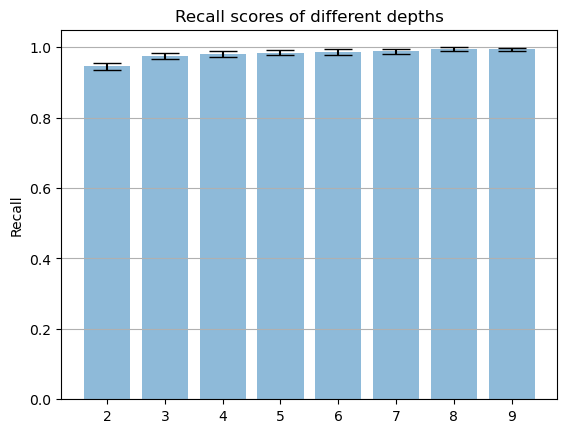

In [80]:
D2_mean = np.mean(results[0])
D2_std= np.std(results[0])
D3_mean = np.mean(results[1])
D3_std = np.std(results[1])
D4_mean = np.mean(results[2])
D4_std = np.std(results[2])
D5_mean = np.mean(results[3])
D5_std = np.std(results[3])
D6_mean = np.mean(results[4])
D6_std = np.std(results[4])
D7_mean = np.mean(results[5])
D7_std = np.std(results[5])
D8_mean = np.mean(results[6])
D8_std = np.std(results[6])
D9_mean = np.mean(results[7])
D9_std = np.std(results[7])

#lists for plot – I bet there is a better way to do this
depth =['2','3','4','5','6','7','8','9']
x_pos = np.arange(len(depth))
#print(x_pos)
Means = [D2_mean,D3_mean,D4_mean,D5_mean,D6_mean,D7_mean,D8_mean,D9_mean]
error = [D2_std,D3_std,D4_std,D5_std,D6_std,D7_std,D8_std,D9_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=error, align='center', alpha=0.5, ecolor='black',
capsize=10)
ax.set_ylabel('Recall')
ax.set_xticks(x_pos)
ax.set_xticklabels(depth)
ax.set_title('Recall scores of different depths')
ax.yaxis.grid(True)

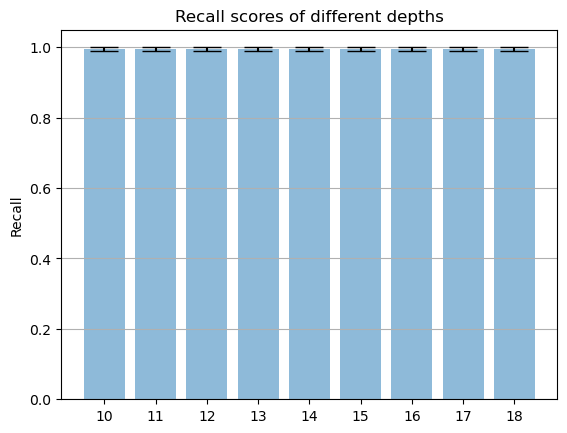

In [81]:
#didn't feel like relabeling all the variables fully, this is really
# D10 - D18
D2a_mean = np.mean(results[8])
D2a_std= np.std(results[8])
D3a_mean = np.mean(results[9])
D3a_std = np.std(results[9])
D4a_mean = np.mean(results[10])
D4a_std = np.std(results[10])
D5a_mean = np.mean(results[11])
D5a_std = np.std(results[11])
D6a_mean = np.mean(results[12])
D6a_std = np.std(results[12])
D7a_mean = np.mean(results[13])
D7a_std = np.std(results[13])
D8a_mean = np.mean(results[14])
D8a_std = np.std(results[14])
D9a_mean = np.mean(results[15])
D9a_std = np.std(results[15])
D10a_mean = np.mean(results[16])
D10a_std = np.std(results[16])

#lists for plot – I bet there is a better way to do this
depth =['10','11','12','13','14','15','16','17','18']
x_pos = np.arange(len(depth))
#print(x_pos)
Means = [D2a_mean,D3a_mean,D4a_mean,D5a_mean,D6a_mean,D7a_mean,D8a_mean,D9a_mean,D10a_mean]
error = [D2a_std,D3a_std,D4a_std,D5a_std,D6a_std,D7a_std,D8a_std,D9a_std,D10a_std]
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=error, align='center', alpha=0.5, ecolor='black',
capsize=10)
ax.set_ylabel('Recall')
ax.set_xticks(x_pos)
ax.set_xticklabels(depth)
ax.set_title('Recall scores of different depths')
ax.yaxis.grid(True)

In [85]:
# seems to be best from 10 or more depth range, lets look at f1 along
#with it to decide a good depth - since f1 will be a good accuracy measurement
def lookAtModelsf1(models):
    results=[]
    names=[]
    for name, model in models:
        skfold = model_selection.KFold(n_splits=9)
        cv_results= cross_val_score(model, X_train, y_train, cv=skfold,
        scoring='f1')
        results.append(cv_results)
        names.append(name)
        print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
    return names, results#if you wish to graph later


#make all your models
models =[]
for d in range(2,20):
    models.append((f'Tree depth {d}',DecisionTreeClassifier(criterion="entropy",max_depth=d)))
#see your results
names,results = lookAtModelsf1(models)

Tree depth 2: 0.9678648996901722 (0.005799979623915232)
Tree depth 3: 0.9693665233460576 (0.005194346138822556)
Tree depth 4: 0.9823134957053258 (0.003942103750089606)
Tree depth 5: 0.9849174747206622 (0.0035938701451625325)
Tree depth 6: 0.9875129019124425 (0.004741364288642439)
Tree depth 7: 0.9883311598656641 (0.005314385918588001)
Tree depth 8: 0.9921599872194139 (0.003956653514275018)
Tree depth 9: 0.9917580454287876 (0.0042416289588125865)
Tree depth 10: 0.9923482237001 (0.003440581760055756)
Tree depth 11: 0.9933656551636818 (0.0029530737382365466)
Tree depth 12: 0.9929616805357002 (0.0036891844944334363)
Tree depth 13: 0.9929616805357002 (0.0036891844944334363)
Tree depth 14: 0.9933836737107836 (0.0030577658380365738)
Tree depth 15: 0.9935630030354484 (0.002971785039410385)
Tree depth 16: 0.992766409826099 (0.0035420865569117505)
Tree depth 17: 0.9933778171890515 (0.0030625827079167976)
Tree depth 18: 0.9929616805357002 (0.0036891844944334363)
Tree depth 19: 0.9929710301375173 

#### Since Depth 10+ worked best for recall in the stratified k-fold validation, and 11 is best for f1 score with k-fold validation, the overall best for recall along with f1-score is at depth 11

# Question Page 11 Final Hyperparameter Thoughts
<p>There was a best setting for my hyperparamenter in the contexts of the data, evaluation method, and the validation technique used. I was able to find that recall converged to a certain score after a tree depth of 10, so I decided to use f1-score as a second measure to get an overall good accuracy evaluation as well, which led me to tune my hyperparameter of depth of my decision tree to 11 maximum. Overall, my data had a really good average values for all validation techniques and always had a <1% standard deviation overall. </p>